In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Salary_Dataset_with_Extra_Features.csv')
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [3]:
df.shape

(22770, 8)

In [4]:
df.columns

Index(['Rating', 'Company Name', 'Job Title', 'Salary', 'Salaries Reported',
       'Location', 'Employment Status', 'Job Roles'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22770 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [6]:
df.describe()

,Rating,Salary,Salaries Reported
count,22770.000000,2.277000e+04,22770.000000
mean,3.918213,6.953872e+05,1.855775
std,0.519675,8.843990e+05,6.823668
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


In [7]:
# checking null
df.isnull().sum()

Rating               0
Company Name         0
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

In [8]:
# number of unique rows in specific columns
df['Job Title'].nunique()

1080

In [9]:
len(df['Company Name'].unique())

11261

In [10]:
df["Location"].nunique()

10

In [11]:
df["Employment Status"].nunique()

4

In [12]:
df["Job Roles"].nunique()

11

In [13]:
print("Mean Salary:", round(df["Salary"].mean()))
print("Median Salary:", round(df["Salary"].median()))
print("Highest Salary:", round(df["Salary"].max()))
print("Lowest Salary:", round(df["Salary"].min()))

Mean Salary: 695387
Median Salary: 500000
Highest Salary: 90000000
Lowest Salary: 2112


In [14]:
# lowest 5 salaries
df["Salary"].sort_values()[:5]

22563     2112
9937      8448
13985    12000
21912    12000
22028    12000
Name: Salary, dtype: int64

In [15]:
# highest 5 salaries
df["Salary"].sort_values(ascending = False)[:5]

18635    90000000
9260     10000000
4471     10000000
7121     10000000
5819      9900000
Name: Salary, dtype: int64

In [16]:
df["Location"].value_counts()

Bangalore         8264
Hyderabad         4467
New Delhi         4176
Chennai           2458
Pune              2134
Mumbai             749
Kolkata            178
Madhya Pradesh     155
Kerala             108
Jaipur              81
Name: Location, dtype: int64

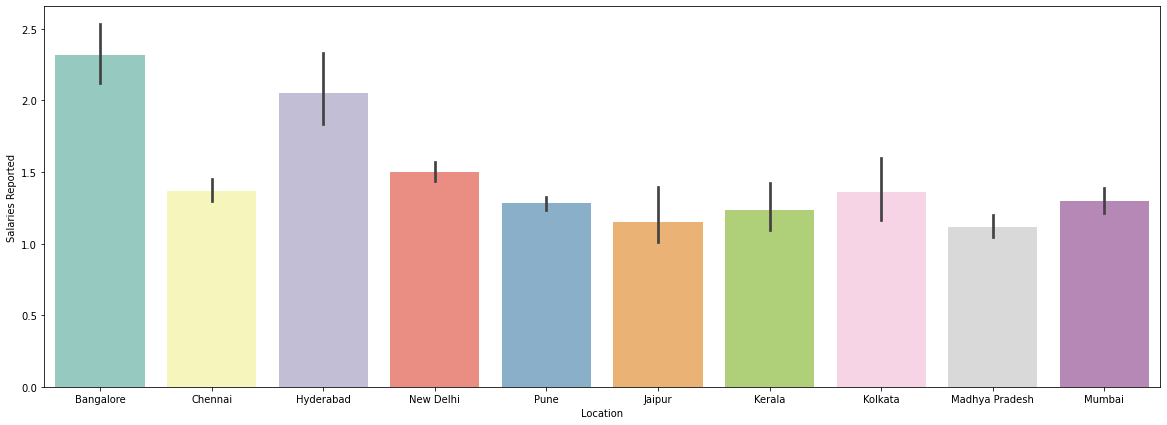

In [17]:
plt.figure(figsize = (20, 7))
sns.barplot(x = df["Location"], y = df["Salaries Reported"], palette = "Set3");

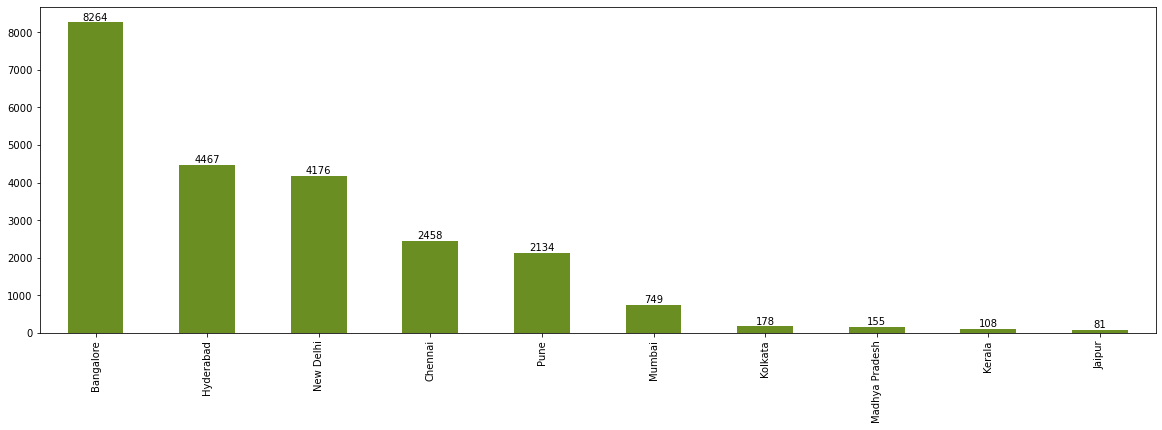

In [18]:
plt.figure(figsize = (20, 6))
ax = df.Location.value_counts().plot(kind = 'bar', color = 'olivedrab')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')

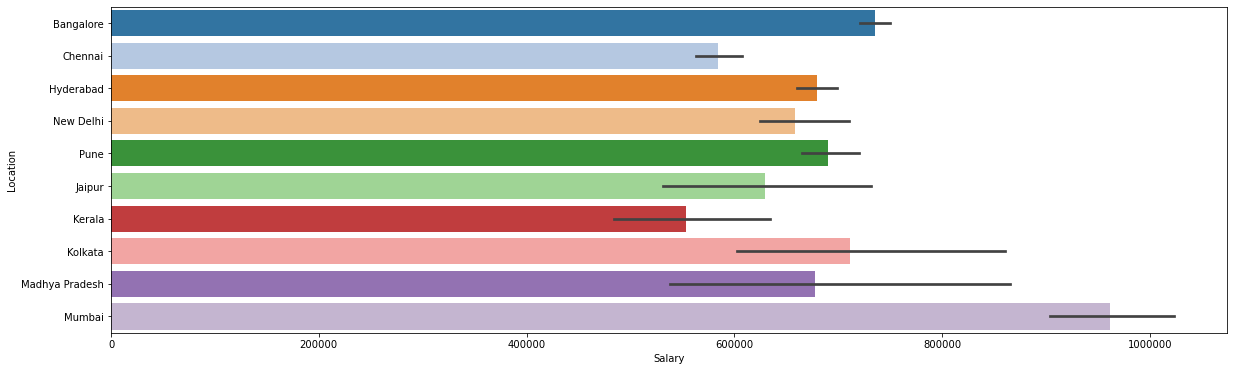

In [19]:
plt.figure(figsize = (20, 6))
plt.ticklabel_format(style = 'plain')
sns.barplot(x = df["Salary"], y = df["Location"], palette = "tab20");

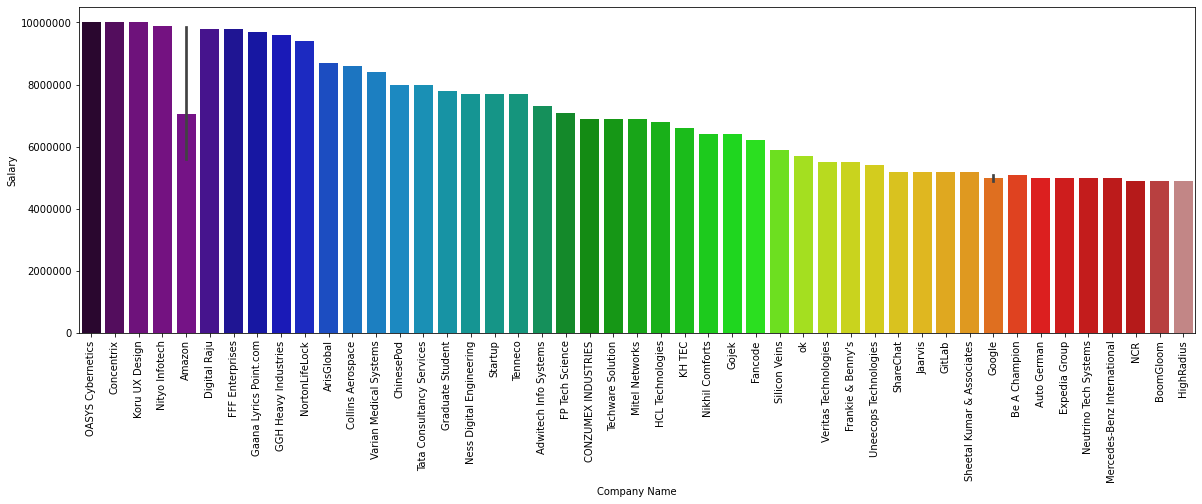

In [20]:
plt.figure(figsize = (20, 6))
plt.xticks(rotation = 90)
plt.ticklabel_format(style = 'plain')
df.sort_values("Salary", axis = 0, ascending = False, inplace = True)
sns.barplot(x = df["Company Name"][1:51],
            y = df["Salary"][1:51],
            palette = "nipy_spectral");

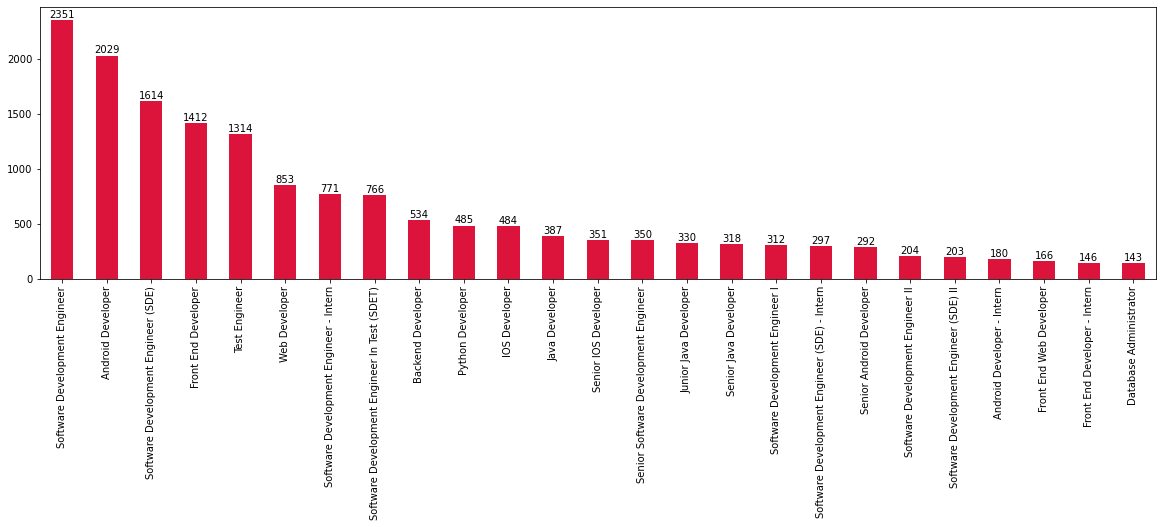

In [21]:
plt.figure(figsize = (20, 5))
ax = df["Job Title"].value_counts()[:25].plot(kind = 'bar',
                                              color = "crimson")

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')

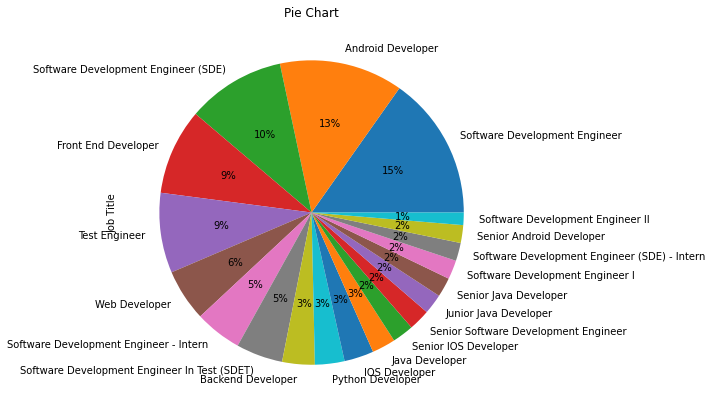

In [22]:
df["Job Title"].value_counts()[:20].plot.pie(figsize = (7, 7),
                                             autopct = '%1.0f%%')
plt.title("Pie Chart")
plt.xticks(rotation = 90)
plt.show()

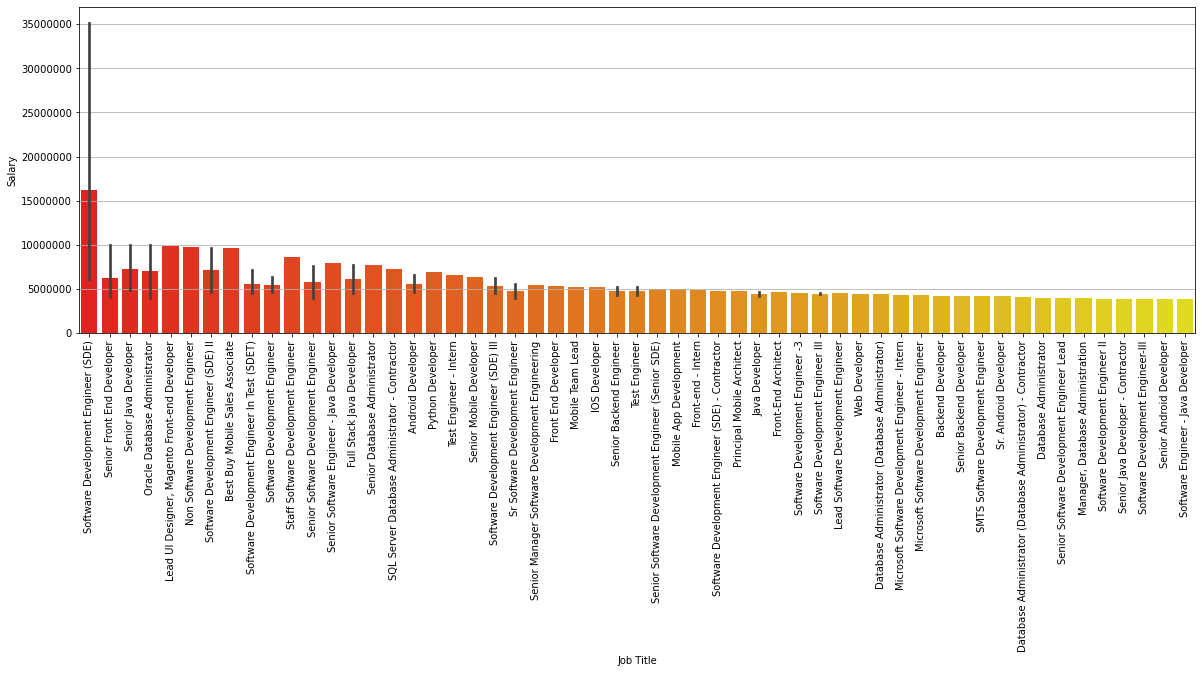

In [23]:
# job title vs top 100 highest salaries
plt.figure(figsize = (20, 6))
plt.grid()
plt.xticks(rotation = 90)
plt.ticklabel_format(style = 'plain')
df.sort_values("Salary", axis = 0,
                         ascending = False,
                         inplace = True)
sns.barplot(x = df["Job Title"][:100],
            y = df["Salary"],
            palette = "autumn");


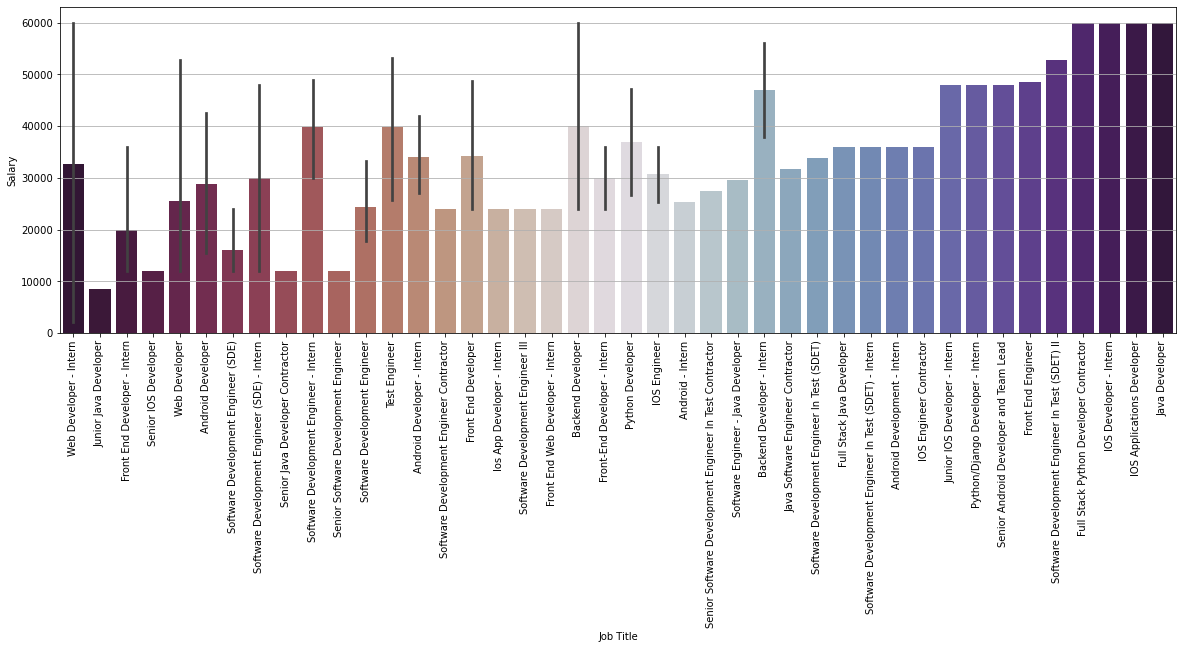

In [24]:
# job title vs top 100 lowest salaries
plt.figure(figsize = (20, 6))
plt.grid()
plt.xticks(rotation = 90)
plt.ticklabel_format(style = 'plain')
df.sort_values("Salary", axis = 0, ascending = True, inplace = True)
sns.barplot(x = df["Job Title"][:100], y = df["Salary"], palette = "twilight_shifted_r");

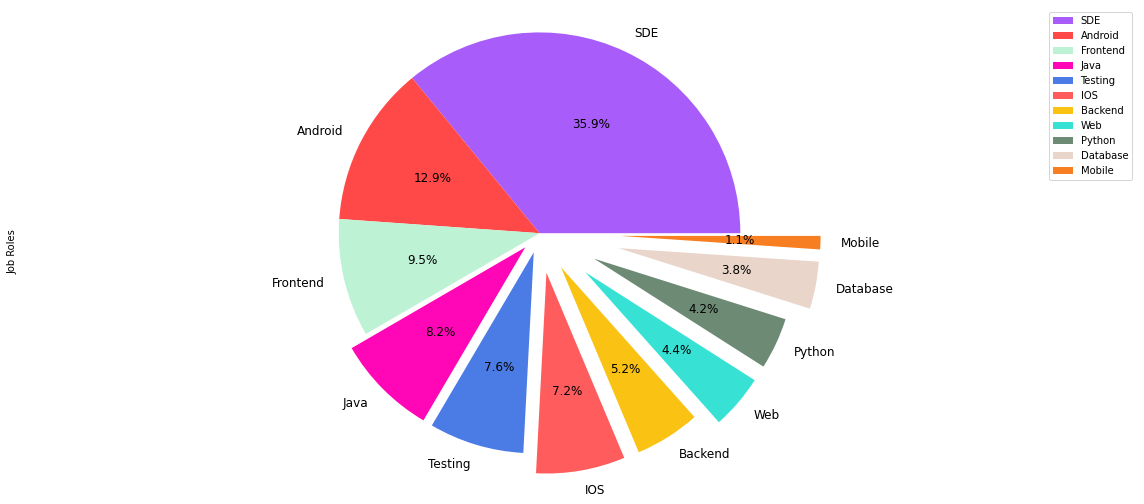

In [25]:
plt.figure(figsize = (20, 9))

counts = df["Job Roles"].value_counts()
explode = (0, 0, 0, 0.1, 0.1, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4)
colors = ['#A85CF9', '#FF4949', '#BDF2D5', '#FF06B7', '#4B7BE5', '#FF5D5D', '#FAC213', '#37E2D5', '#6D8B74', '#E9D5CA', '#F77E21']

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [26]:
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
22563,2.6,Keeves Technologies,Web Developer - Intern,2112,1,Bangalore,Intern,Web
9937,3.7,Virtusa,Junior Java Developer,8448,5,Hyderabad,Full Time,Java
5548,4.0,Nasya Software Technologies,Front End Developer - Intern,12000,1,Bangalore,Intern,Frontend
7514,3.9,Al-Jazirah,Senior IOS Developer,12000,1,Bangalore,Full Time,IOS
22028,3.9,Yes Bank,Web Developer,12000,1,Bangalore,Full Time,Web


In [27]:
df.drop('Company Name', axis = 1, inplace=True)

In [28]:
location_list = df["Location"].unique()
location_list

array(['Bangalore', 'Hyderabad', 'New Delhi', 'Chennai', 'Mumbai', 'Pune',
       'Jaipur', 'Kolkata', 'Kerala', 'Madhya Pradesh'], dtype=object)

In [29]:
lst = [i for i in range(0,len(location_list))]
lst

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [30]:
df['Location'].replace(location_list, lst, inplace=True)
df.head()

,Rating,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
22563,2.6,Web Developer - Intern,2112,1,0,Intern,Web
9937,3.7,Junior Java Developer,8448,5,1,Full Time,Java
5548,4.0,Front End Developer - Intern,12000,1,0,Intern,Frontend
7514,3.9,Senior IOS Developer,12000,1,0,Full Time,IOS
22028,3.9,Web Developer,12000,1,0,Full Time,Web


In [31]:
df['Employment Status'].replace(df['Employment Status'].unique(), [i for i in range(0,len(df['Employment Status'].unique()))], inplace=True)
df.head()

,Rating,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
22563,2.6,Web Developer - Intern,2112,1,0,0,Web
9937,3.7,Junior Java Developer,8448,5,1,1,Java
5548,4.0,Front End Developer - Intern,12000,1,0,0,Frontend
7514,3.9,Senior IOS Developer,12000,1,0,1,IOS
22028,3.9,Web Developer,12000,1,0,1,Web


In [32]:
df['Job Roles'].replace(df['Job Roles'].unique(), [i for i in range(0,len(df['Job Roles'].unique()))], inplace=True)
df.head()

,Rating,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
22563,2.6,Web Developer - Intern,2112,1,0,0,0
9937,3.7,Junior Java Developer,8448,5,1,1,1
5548,4.0,Front End Developer - Intern,12000,1,0,0,2
7514,3.9,Senior IOS Developer,12000,1,0,1,3
22028,3.9,Web Developer,12000,1,0,1,0


In [33]:
new_df = df.drop("Job Title", axis=1)
new_df.head()

,Rating,Salary,Salaries Reported,Location,Employment Status,Job Roles
22563,2.6,2112,1,0,0,0
9937,3.7,8448,5,1,1,1
5548,4.0,12000,1,0,0,2
7514,3.9,12000,1,0,1,3
22028,3.9,12000,1,0,1,0


In [34]:
X = new_df.drop("Salary", axis=1)
X.head()

,Rating,Salaries Reported,Location,Employment Status,Job Roles
22563,2.6,1,0,0,0
9937,3.7,5,1,1,1
5548,4.0,1,0,0,2
7514,3.9,1,0,1,3
22028,3.9,1,0,1,0


In [35]:
y = new_df["Salary"]
y.head()

22563     2112
9937      8448
5548     12000
7514     12000
22028    12000
Name: Salary, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=X["Location"])

In [52]:
data = pd.concat([X_train, y_train], axis=1)
data_unseen = pd.concat([X_test, y_test], axis=1)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (18216, 6)
Unseen Data For Predictions: (4554, 6)


In [81]:
data.drop("Location", axis=1, inplace=True)
data_unseen.drop("Location", axis=1, inplace=True)

In [37]:
data = new_df.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = new_df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (20493, 6)
Unseen Data For Predictions: (2277, 6)


In [40]:
# for pycaret jinja2 import and 2.11.3 version is required here and markup saafe with 2.0.1 is required hen the availble was 2.1.1
import jinja2
from pycaret.regression import *

In [82]:
exp_reg = setup(data = data, target = 'Salary', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Salary
2,Original Data,"(18216, 5)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(12751, 17)"


In [83]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,394610.1180,385274673055.2619,618497.4113,0.0962,0.8125,1.0720,0.2860
lightgbm,Light Gradient Boosting Machine,396433.2432,387377811215.3462,620170.5142,0.0914,0.8124,1.0609,0.1940
lasso,Lasso Regression,397488.4488,387531588069.8385,620324.3753,0.0908,0.8400,1.0696,0.0590
ridge,Ridge Regression,397485.0201,387529314541.4699,620322.2765,0.0908,0.8393,1.0696,0.0100
lar,Least Angle Regression,397488.2917,387531737052.6554,620324.5107,0.0908,0.8401,1.0696,0.0110
llar,Lasso Least Angle Regression,397485.8468,387531270083.2200,620324.0218,0.0908,0.8393,1.0697,0.0110
br,Bayesian Ridge,397466.7376,387524027176.0974,620315.0385,0.0908,0.8344,1.0698,0.0150
lr,Linear Regression,397488.3292,387531703550.7670,620324.4797,0.0908,0.8401,1.0696,0.8070
rf,Random Forest Regressor,406528.2612,404397366703.1344,633729.8065,0.0510,0.8293,1.0813,0.5920
huber,Huber Regressor,376798.9368,405477000309.3478,634429.3107,0.0493,0.7737,0.8492,0.2410


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [55]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,408494.2446,414183961088.8553,643571.2556,0.1079,0.8364,1.0992
1,395461.6771,482094610029.2426,694330.3321,0.1034,0.8059,1.0747
2,403831.0596,407854166139.0630,638634.6108,0.0842,0.8261,1.0752
3,381045.9722,383956043370.0743,619641.8670,0.1286,0.8090,1.1016
4,384974.0806,308130866836.9634,555095.3673,0.1491,0.7974,1.1016
5,371107.7961,306905440905.6612,553990.4700,0.1147,0.8078,1.0741
6,406014.0801,428587499414.4389,654665.9449,0.0953,0.8052,1.0397
7,374600.0635,340130700266.0062,583207.2533,0.1270,0.7763,0.9801
8,396018.0571,432055843022.0118,657309.5489,0.1098,0.7794,0.9650


In [56]:
ridge = create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,416943.2742,422309330453.5696,649853.3146,0.0904,0.8789,1.1199
1,401803.6633,490725150345.9486,700517.7730,0.0873,0.8420,1.0984
2,409363.5579,412035181021.6450,641899.6659,0.0748,0.8572,1.0933
3,384139.5547,387861208740.0440,622785.0422,0.1197,0.8149,1.1007
4,390974.5850,310669763679.5128,557377.5773,0.1420,0.8125,1.0512
5,380210.4302,315809524801.3278,561969.3273,0.0890,0.8902,1.1043
6,407596.1429,431760680401.9606,657084.9872,0.0886,0.8229,1.0290
7,376776.7764,342970168470.0022,585636.5498,0.1197,0.8055,0.9604
8,400036.0208,433926564813.5075,658731.0262,0.1059,0.7976,0.9665


In [57]:
huber = create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,394081.3602,439962773905.6032,663296.8973,0.0524,0.8078,0.8946
1,383847.7193,513116832848.9476,716321.7384,0.0457,0.7818,0.8784
2,386302.1090,430096496404.7243,655817.4261,0.0343,0.7958,0.8718
3,368821.9701,408650886478.8128,639258.0750,0.0725,0.7680,0.8859
4,370718.7740,331746649334.4490,575974.5214,0.0838,0.7578,0.8437
5,357800.2669,323004742556.7686,568335.0619,0.0682,0.7850,0.8754
6,388610.8801,453753363168.4164,673612.1756,0.0422,0.7703,0.8252
7,360109.9836,361498313894.4613,601247.2985,0.0722,0.7351,0.7719
8,376960.6367,454969274649.6274,674514.1026,0.0626,0.7407,0.7639


In [61]:
tuned_gbr = tune_model(gbr, optimize="R2")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,417609.6378,422071911638.5016,649670.6178,0.0910,0.8519,1.1457
1,403850.9254,491392203529.1483,700993.7257,0.0861,0.8306,1.1288
2,411239.4460,408856188126.5037,639418.6329,0.0819,0.8429,1.1356
3,392489.7566,394635439185.4242,628200.1585,0.1043,0.8321,1.1635
4,395941.1396,315112544803.1667,561348.8619,0.1298,0.8230,1.2222
5,379084.7900,311804740860.7160,558394.7894,0.1005,0.8288,1.1317
6,408346.9305,432709290496.0404,657806.4233,0.0866,0.8196,1.0846
7,383964.7192,346639193276.6132,588760.7267,0.1103,0.8015,1.0457
8,404367.2652,438836736907.7690,662447.5352,0.0958,0.8016,1.0197


In [62]:
tuned_ridge = tune_model(ridge, optimize="R2")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,416736.0642,422039779986.3526,649645.8881,0.0910,0.8773,1.1191
1,401722.2349,490836876280.5737,700597.5138,0.0871,0.8362,1.0978
2,409056.9315,411762301904.9698,641687.0748,0.0754,0.8653,1.0930
3,383959.5195,387767165944.0878,622709.5358,0.1199,0.8140,1.0992
4,390970.9536,310745782016.1226,557445.7660,0.1418,0.8112,1.0516
5,380070.3735,315565503851.5996,561752.1730,0.0897,0.8834,1.1036
6,407519.8663,431808878921.2195,657121.6622,0.0885,0.8201,1.0285
7,376749.0526,342924650173.5604,585597.6863,0.1198,0.8027,0.9601
8,400048.2118,434091570075.2867,658856.2590,0.1056,0.7991,0.9664


In [63]:
tuned_huber = tune_model(huber, optimize="R2")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,397602.8925,433584213424.3713,658471.1181,0.0662,0.8160,0.9434
1,385551.8853,504552761346.0104,710318.7745,0.0616,0.7891,0.9275
2,390060.9548,423603612603.4342,650848.3791,0.0488,0.8058,0.9210
3,370326.5445,400624155293.4012,632948.7778,0.0908,0.7759,0.9352
4,373920.0905,324456330698.4346,569610.6834,0.1040,0.7652,0.8876
5,360957.6494,317735076435.7600,563679.9415,0.0834,0.7964,0.9265
6,390670.1342,445679810598.6049,667592.5483,0.0592,0.7747,0.8689
7,362069.9031,353855410663.9352,594857.4709,0.0918,0.7410,0.8128
8,379737.4649,446994698440.7704,668576.6212,0.0790,0.7471,0.8079


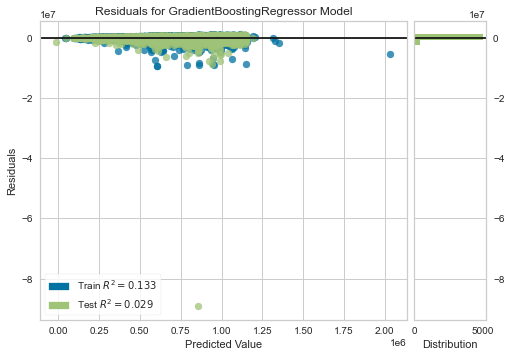

In [64]:
plot_model(gbr)

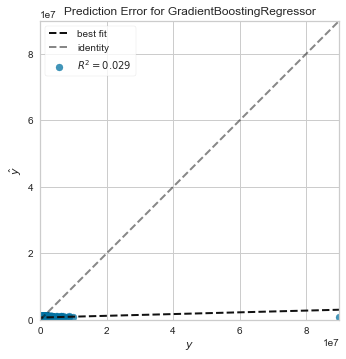

In [65]:
plot_model(gbr, plot = 'error')

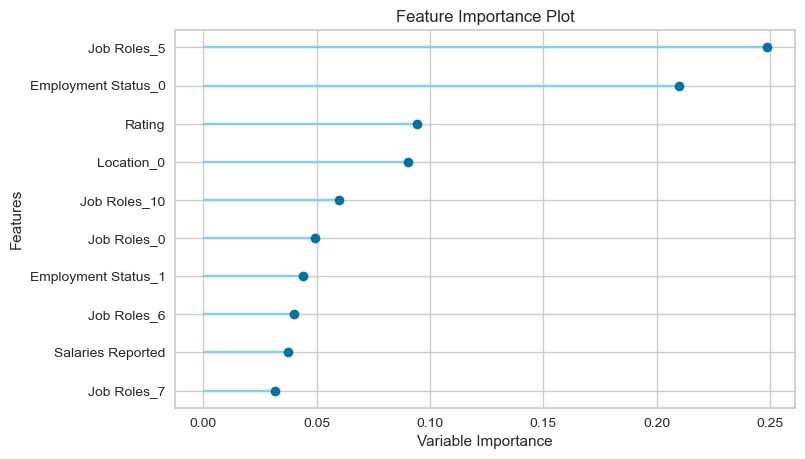

In [66]:
plot_model(gbr, plot='feature')

In [67]:
evaluate_model(gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [68]:
predict_model(gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,403944.0636,1836325571953.1797,1355110.9076,0.0287,0.8088,1.0586


,Rating,Salaries Reported,Location_0,Location_1,Location_2,Location_3,Location_4,Location_5,Location_6,Location_7,...,Job Roles_2,Job Roles_3,Job Roles_4,Job Roles_5,Job Roles_6,Job Roles_7,Job Roles_8,Job Roles_9,Salary,Label
0,4.2,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,100000,746445.397776
1,2.9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,84000,465749.486387
2,4.1,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,204000,461984.606364
3,3.9,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200000,517492.168782
4,4.1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500000,595910.662706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5460,3.8,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,588000,592685.625665
5461,4.3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,264000,310576.111270
5462,3.8,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1000000,592685.625665
5463,3.3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,324000,495850.507707


In [71]:
final_gbr = finalize_model(gbr)

In [72]:
#Final Gradient Boosting Machine parameters for deployment
print(final_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [73]:
predict_model(final_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,401752.8512,1821025266582.2795,1349453.6919,0.0368,0.8037,1.0604


,Rating,Salaries Reported,Location_0,Location_1,Location_2,Location_3,Location_4,Location_5,Location_6,Location_7,...,Job Roles_2,Job Roles_3,Job Roles_4,Job Roles_5,Job Roles_6,Job Roles_7,Job Roles_8,Job Roles_9,Salary,Label
0,4.2,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,100000,707007.012296
1,2.9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,84000,454894.141485
2,4.1,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,204000,472067.238907
3,3.9,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200000,453616.670992
4,4.1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500000,616718.487448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5460,3.8,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,588000,608269.676258
5461,4.3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,264000,275489.063711
5462,3.8,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1000000,608269.676258
5463,3.3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,324000,488615.904136


In [74]:
unseen_predictions = predict_model(final_gbr, data=data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,398838.0514,396822164181.6834,629938.2225,0.1161,0.8126,1.0881


,Rating,Salaries Reported,Location,Employment Status,Job Roles,Salary,Label
5948,2.7,1,3,1,2,228000,4.313043e+05
13684,4.6,1,0,1,5,800000,1.022939e+06
10853,3.6,1,0,1,9,1300000,8.571319e+05
21632,3.6,1,0,1,6,500000,6.356066e+05
6973,3.7,1,5,1,2,1100000,6.201801e+05


In [75]:
save_model(final_lightgbm,'Final Gbr Model 29June2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Salary',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy=...
                                            learning_rate=0.1, loss='ls',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                           

In [76]:
saved_final_gbr = load_model('Final Gbr Model 29June2022')

Transformation Pipeline and Model Successfully Loaded


In [77]:
new_prediction = predict_model(saved_final_gbr, data=data_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,398838.0514,396822164181.6834,629938.2225,0.1161,0.8126,1.0881


In [78]:
new_prediction.head()

,Rating,Salaries Reported,Location,Employment Status,Job Roles,Salary,Label
5948,2.7,1,3,1,2,228000,4.313043e+05
13684,4.6,1,0,1,5,800000,1.022939e+06
10853,3.6,1,0,1,9,1300000,8.571319e+05
21632,3.6,1,0,1,6,500000,6.356066e+05
6973,3.7,1,5,1,2,1100000,6.201801e+05


In [ ]:
# the above was the most basic method of using pycaret, next we will see the intermediate level